In [2]:
# dataframe management
import pandas as pd             

# numerical computation
import numpy as np

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   


# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
%matplotlib inline

# seaborn can generate several warnings, we ignore them
import warnings 
warnings.filterwarnings("ignore")

# import the dataset library
from sklearn import datasets

Let's load the data

In [12]:
df=pd.read_csv('train.csv')

In [13]:
np.shape(df)

(621300, 136)

In [14]:
all_data=df.copy(deep=True)
all_data_na = (all_data.isnull().sum(axis=0) / len(all_data)) * 100
#all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
#missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
#missing_data

In [15]:
all_data_na=(all_data.isnull().sum(axis=0).sort_values(ascending=False))
all_data_na

kurt_temperature_alarms_prev14d      0
mean_wind_speed_prev3d               0
mean_pressure_prev3d                 0
min_pressure_prev7d                  0
max_pressure_prev7d                  0
                                    ..
equipment_max_persistance_prev7d     0
equipment_mean_persistance_prev7d    0
equipment_min_persistance_prev7d     0
fire/smoke_max_persistance_prev7d    0
SITE_ID                              0
Length: 136, dtype: int64

In [16]:
all_data_na=(all_data.isnull().sum()).sort_values(ascending=False)
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data.head()
# no missing value is there

,Missing Ratio


In [17]:
all_data.columns.tolist()

['SITE_ID',
 'DATE',
 'CELL_TYPE_Macro',
 'CELL_TYPE_Mobil',
 'CELL_TYPE_TRP',
 'CELL_TYPE_Tx site',
 'CELL_TYPE_micro',
 'N_TRANSPORTED_SITES',
 'GEOGRAPHIC_CLUSTER_K_0',
 'GEOGRAPHIC_CLUSTER_K_1',
 'GEOGRAPHIC_CLUSTER_K_2',
 'GEOGRAPHIC_CLUSTER_K_3',
 'GEOGRAPHIC_CLUSTER_K_4',
 'GEOGRAPHIC_CLUSTER_K_5',
 'GEOGRAPHIC_CLUSTER_K_6',
 'GEOGRAPHIC_CLUSTER_K_7',
 'GEOGRAPHIC_CLUSTER_K_8',
 'GEOGRAPHIC_CLUSTER_K_9',
 'aircon_sum_wo_prev7d',
 'aircon_sum_wo_prev14d',
 'aircon_sum_target_next14d',
 'mean_temperature_prev7d',
 'max_temperature_prev7d',
 'min_temperature_prev7d',
 'mean_temperature_prev3d',
 'max_temperature_prev3d',
 'min_temperature_prev3d',
 'mean_rain_mm_prev7d',
 'max_rain_mm_prev7d',
 'min_rain_mm_prev7d',
 'mean_rain_mm_prev3d',
 'max_rain_mm_prev3d',
 'min_rain_mm_prev3d',
 'mean_humidity_prev7d',
 'max_humidity_prev7d',
 'min_humidity_prev7d',
 'mean_humidity_prev3d',
 'max_humidity_prev3d',
 'min_humidity_prev3d',
 'mean_wind_speed_prev7d',
 'max_wind_speed_prev7d',
 

In [32]:
target_variable='aircon_sum_target_next14d'
input_variables=df.columns[df.columns!=target_variable]
input_data=df.loc[:,input_variables]
input_variables

Index(['SITE_ID', 'CELL_TYPE_Macro', 'CELL_TYPE_Mobil', 'CELL_TYPE_TRP',
       'CELL_TYPE_Tx site', 'CELL_TYPE_micro', 'N_TRANSPORTED_SITES',
       'GEOGRAPHIC_CLUSTER_K_0', 'GEOGRAPHIC_CLUSTER_K_1',
       'GEOGRAPHIC_CLUSTER_K_2',
       ...
       'skew_fire/smoke_alarms_prev14d', 'skew_ge_alarms_prev14d',
       'skew_power_alarms_prev14d', 'skew_temperature_alarms_prev14d',
       'kurt_equipment_alarms_prev14d', 'kurt_fire/smoke_alarms_prev14d',
       'kurt_ge_alarms_prev14d', 'kurt_power_alarms_prev14d',
       'kurt_temperature_alarms_prev14d', 'Day'],
      dtype='object', length=135)

## Feature Creation

In [19]:
from datetime import date
import datetime

df['Day'] = df['DATE'].apply(lambda x: 
                      (date(datetime.datetime.strptime(x,"%Y-%m-%d").year,datetime.datetime.strptime(x,"%Y-%m-%d").month,
                      datetime.datetime.strptime(x,"%Y-%m-%d").day)-date(2019,4,10)).days)
df.drop(['DATE'],axis=1,inplace=True)


In [50]:
site_IDs=df['SITE_ID']
Dates=df['Day']
N_Transported_Sites=df[ 'N_TRANSPORTED_SITES']
Cell_Type=df.loc[:, 'CELL_TYPE_Macro': 'CELL_TYPE_micro']
Geographical_Cluster=df.loc[:, 'GEOGRAPHIC_CLUSTER_K_0': 'GEOGRAPHIC_CLUSTER_K_9']
m3_w_prevXd=df.loc[ :, 'mean_temperature_prev7d':  'min_pressure_prev3d']
m3_w_f_nextXd=df.loc[:,'mean_temperature_f_next14d':'min_pressure_f_next7d']
aircon_sum=df.loc[:,'aircon_sum_wo_prev7d':'aircon_sum_target_next14d']
cat_sum_alarms_prevXd=df.loc[:,'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
cat_m3_persistance_prevXd=df.loc[:,'equipment_max_persistance_prev7d':'temperature_min_persistance_prev3d']
skew_cat_alarms_prev14d=df.loc[:,'skew_equipment_alarms_prev14d': 'skew_temperature_alarms_prev14d']
kurt_cat_alarms_prev14d=df.loc[:,'kurt_equipment_alarms_prev14d': 'kurt_temperature_alarms_prev14d']
target_data=df.loc[:,'aircon_sum_target_next14d']
cat_sum_alarms_prevXd=df.loc[:,'equipment_sum_alarms_prev14d':'temperature_sum_alarms_prev3d']
cat_sum_alarms_prevXd.loc[:,'temperature_sum_alarms_prev3d']#cat_sum_alarms_prevXd

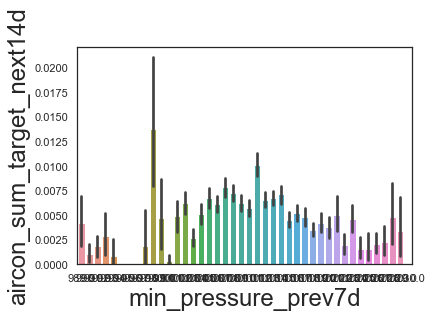

In [42]:
sns.barplot(x=df['min_pressure_prev7d'],y=df['aircon_sum_target_next14d']);

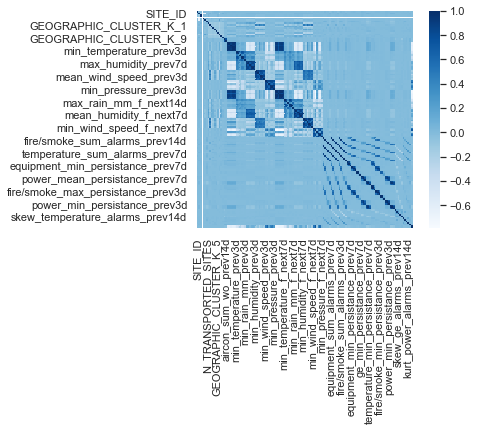

In [43]:
df[input_variables] = df[input_variables].astype(float)

cov=df[input_variables].corr(method='pearson')
sns.heatmap(cov,square=True,annot=False,cmap="Blues");
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

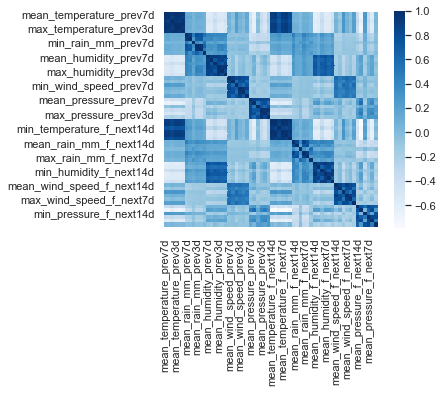

In [63]:

cov=df.loc[:,'mean_temperature_prev7d': 'min_pressure_f_next7d'].corr(method='pearson')
sns.heatmap(cov,square=True,annot=False,cmap="Blues");
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

<Figure size 10800x10800 with 0 Axes>

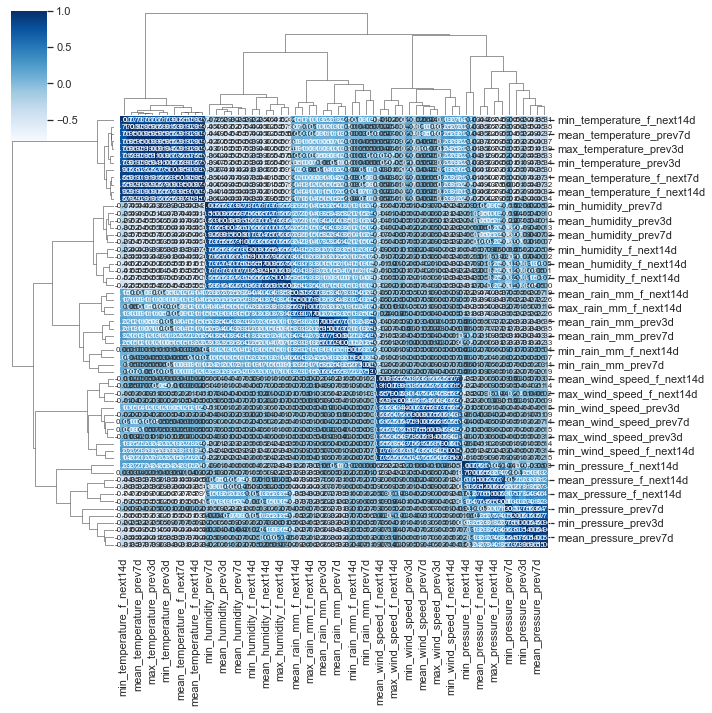

In [64]:
plt.figure(figsize=(150, 150));
sns.clustermap(cov,square=True,annot True,cmap="Blues",annot_kws={"size": 8},fmt='.2f');

### Regression


In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [75]:
X = df.loc[:,'mean_temperature_prev7d': 'min_pressure_f_next7d']
y = df[target_variable]

In [76]:
lr_model = LinearRegression();
lr_score = cross_val_score(lr_model,X,y,cv=KFold(n_splits=10, shuffle=True, random_state=1234))

In [77]:
lr_score.mean()

0.0029678762871645616

In [78]:
lr_score.std()

0.0003191841194347312

In [79]:
lasso_model = LassoCV();
lasso_score = cross_val_score(lasso_model,X,y,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
lasso_score.mean()

0.002656679437977827

In [80]:
lasso_score.std()

0.00024009948437555114

In [81]:
lr_score

array([0.00251665, 0.00246019, 0.00286029, 0.00314385, 0.00354113,
       0.00326813, 0.0030724 , 0.00317307, 0.00281026, 0.00283279])

In [82]:
lasso_score

array([0.00234359, 0.00230118, 0.00254197, 0.00253111, 0.00308652,
       0.0029487 , 0.00286533, 0.0027284 , 0.00260385, 0.00261615])

In [ ]:
from sklearn.svm import SVR
svr_lin_model = SVR(kernel="linear")
svr_rbf_model = SVR(kernel="rbf")
svr_lin_score = cross_val_score(svr_lin_model,X,y,cv=KFold(n_splits=10, shuffle=True, random_state=1234))
svr_rbf_score = cross_val_score(svr_rbf_model,X,y,cv=KFold(n_splits=10, shuffle=True, random_state=1234))

In [ ]:
svr_lin_score

In [ ]:
svr_rbf_score

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5, algorithm='kd_tree');
knn_score = cross_val_score(knn_model,X,y,cv=KFold(n_splits=10, shuffle=True, random_state=1234))

In [ ]:
knn_score.mean()

In [ ]:
knn_score.std()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(oob_score=True, random_state=1234);

In [ ]:
rf_model.fit(X,y)

In [245]:
rf_model.oob_score_